In [3]:
from supervised_networks import NetworkDataset, ValueNet, PolicyNet, train_value_net, train_policy_net
from supervised_functions import generate_beam_search_data
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import time
import pickle
import pandas as pd
from Cpp_code.former_class_cpp import FormerGame

# Supervised learning

This notebook gives the code used to obtain each result related to supervised learning. At the end of each subsection, we also plot the results, although these are the results we have stored to CSVs by using the given code.

# Generate data

In [4]:
N = 1 # Set number of games to generate, and choose save path
save_path = 'beam_search_data.pkl'
generate_beam_search_data(N, 9, 7, 4, 128, T=1)
print("Data generated.")

Generating boards...
Generating training data...
# 0/1...
Data generated.


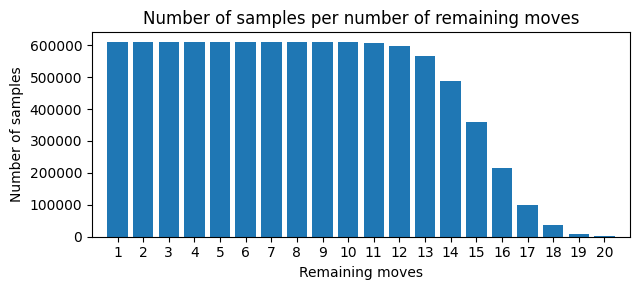

In [11]:
from figure_functions import plot_move_counts
plot_move_counts(show=True)

# Hyperparameter tuning

Here we only show the plots. Code is in the "supervised_hyper.py" file. Random forest fitting is done in the plotting code.

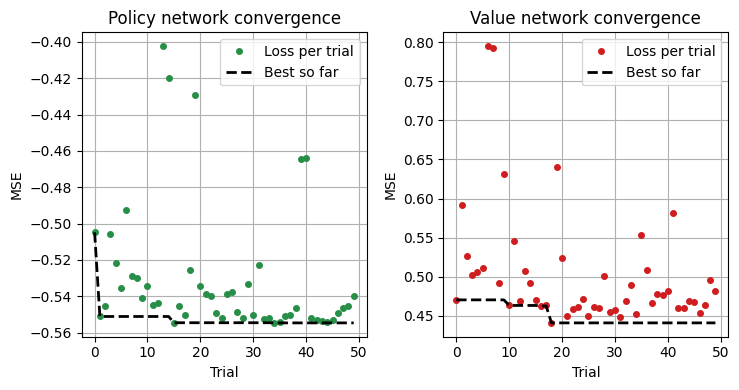

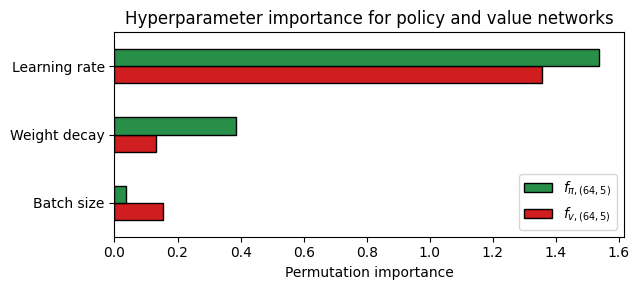

In [17]:
from figure_functions import plot_hyperparameter_tuning
plot_hyperparameter_tuning(show=True)

# Training neural networks

This section is *only* used for training neural networks. It is divided into 2 sections:
1) Value networks 
2) Policy networks 

First, we load the stored data (generated from beam search with 1-look-ahead heuristic and beam width 128).

In [ ]:
# Load data. Each batch is approximately 100.000 data samples. First 81 data batches are training, last 10 are validation.
loaded_data = []
n_batches = 90  # Max: 90
for i in range(0, n_batches+1):
    batch_num = f"{i:03d}"
    file_path = (f"data/training_data/batches/training_batch_{batch_num}.pkl")
    with open(file_path, "rb") as f:
        batch = pickle.load(f)
    loaded_data.extend(batch)
    del batch

print(f"Loaded {len(loaded_data)} samples from {n_batches} batches")

# Splitting the data into training and testing sets
split_factor = 0.9
train_size = int(split_factor * len(loaded_data))
train_data = loaded_data[:train_size]
validation_data = loaded_data[train_size:]
print(f"Data is split into {round(split_factor*100,0)}% training and {round((1-split_factor)*100,0)}% validation data. Sizes: {len(train_data)} and {len(validation_data)}.")

del loaded_data

Loaded 183686 samples from 90 batches


### Value networks

The following value networks are trained:
- $w=32$, $d=5$, with $\eta = 0.00073$, $n_\mathrm{batch} = 64$, $\lambda = 5.9\cdot 10^{-6}$ (MSE from hyperparameter tuning: 0.4878)
- $w=32$, $d=10$, with $\eta = 0.0022$, $n_\mathrm{batch} = 128$, $\lambda = 2.0\cdot 10^{-6}$ (MSE from hyperparameter tuning: 0.4839)
- $w=64$, $d=5$, with $\eta = 0.00045$, $n_\mathrm{batch} = 64$, $\lambda = 6.6\cdot 10^{-6}$ (MSE from hyperparameter tuning: 0.4409)
- $w=64$, $d=10$, with $\eta = 0.00068$, $n_\mathrm{batch} = 64$, $\lambda = 1.45\cdot 10^{-6}$ (MSE from hyperparameter tuning: 0.4296)

In [3]:
train_set_value = NetworkDataset(train_data, "value")
valid_set_value = NetworkDataset(validation_data, "value")

w, d = 64, 5
device = torch.device("mps")
value_net = ValueNet(5, (9,7), d, w)
value_net.to(device)
train_value_net(value_net, train_set_value, valid_set_value, epochs=15, batch_size=64, learning_rate=0.00045, weight_decay=6.6e-6, csv_path=f"/Users/espen/Desktop/masteroppgave_uten_chat/results/6.2_supervised/training_validation/value/w{w}d{d}_logs.csv", checkpoint_folder=f"/Users/espen/Desktop/masteroppgave_uten_chat/models/supervised/value/w{w}d{d}")

Using device mps:0


Epoch 1/15 — Train L=0.6641 Val MSE=0.4607 MAE=0.4549 (1951.4s)


Epoch 2/15 — Train L=0.4556 Val MSE=0.4526 MAE=0.4421 (2001.7s)


Epoch 3/15 — Train L=0.4231 Val MSE=0.4401 MAE=0.4516 (2046.3s)


Epoch 4/15 — Train L=0.4054 Val MSE=0.4051 MAE=0.4276 (2013.0s)


Epoch 5/15 — Train L=0.3937 Val MSE=0.3875 MAE=0.4049 (2023.8s)


Epoch 6/15 — Train L=0.3854 Val MSE=0.3855 MAE=0.4000 (1887.2s)


Epoch 7/15 — Train L=0.3793 Val MSE=0.3797 MAE=0.3937 (1911.4s)


Epoch 8/15 — Train L=0.3746 Val MSE=0.3800 MAE=0.3995 (1877.7s)


Epoch 9/15 — Train L=0.3704 Val MSE=0.3782 MAE=0.3931 (1753.3s)


Epoch 10/15 — Train L=0.3669 Val MSE=0.3715 MAE=0.3898 (1755.4s)


Epoch 11/15 — Train L=0.3640 Val MSE=0.3678 MAE=0.3904 (1771.8s)


Epoch 12/15 — Train L=0.3613 Val MSE=0.3695 MAE=0.3876 (1775.0s)


Epoch 13/15 — Train L=0.3589 Val MSE=0.3640 MAE=0.3836 (1776.3s)


Epoch 14/15 — Train L=0.3571 Val MSE=0.3921 MAE=0.4193 (1780.7s)


Epoch 15/15 — Train L=0.3553 Val MSE=0.3621 MAE=0.3840 (1783.5s)


([0.6640795547466644,
  0.45555193713343634,
  0.42307926625955694,
  0.40537764463146264,
  0.3937497941308305,
  0.3853758515391577,
  0.37930790967616995,
  0.37455806633728383,
  0.3704323261996361,
  0.36686123311008867,
  0.36396719806391725,
  0.3612678985520531,
  0.35894489617218306,
  0.35705974192837964,
  0.3553425385768697],
 [0.46072113654206615,
  0.45263214988264155,
  0.4400634247034426,
  0.4050605478513663,
  0.38745844693338305,
  0.38550347931360746,
  0.37966744205380504,
  0.3800038835942583,
  0.3781588771815337,
  0.37145358038468373,
  0.36777708061027364,
  0.3694551611424178,
  0.36398373502911757,
  0.3920578768787847,
  0.3620798731516851],
 [0.45487692896725923,
  0.44205078128344116,
  0.4516393999226372,
  0.42760575376617727,
  0.40487514226166527,
  0.40000273775818107,
  0.3937275907578298,
  0.39952052656636855,
  0.3931095881690991,
  0.3897802162941268,
  0.3903976068578303,
  0.3875982237513906,
  0.3835637833121099,
  0.41934549390258063,
  0.38

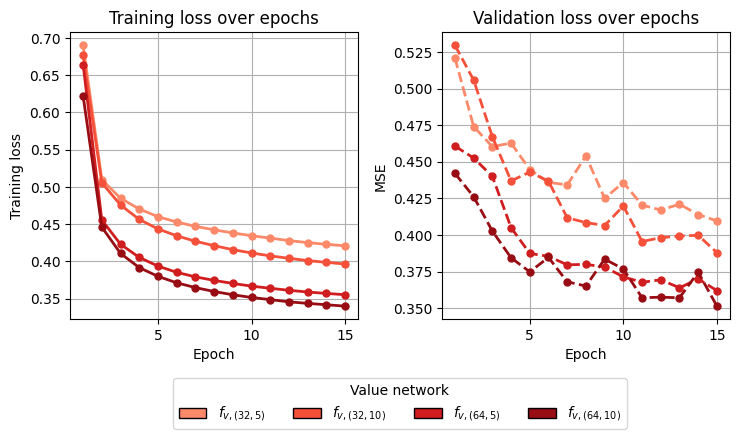

In [7]:
from figure_functions import plot_train_and_validation_for_value_net
plot_train_and_validation_for_value_net(show=True)

In [ ]:
# Check prediction accuracy
value_net = ValueNet(5, (9,7), 10, 64)
value_net.load_state_dict(torch.load(
    "models/supervised/value/w64d10/w64d10.pth",
    map_location="cpu"
))
value_net.eval()

predicted_moves_list = []
actual_moves_list    = []

for idx, (state, true_action, moves_left) in enumerate(validation_data):
    with torch.no_grad():
        pred_moves = value_net.evaluate_state(state)
    
    predicted_moves_list.append(pred_moves)
    actual_moves_list.append(moves_left)
    
    if (idx+1) % 100000 == 0:
        print(f"Processed {idx+1} states.")

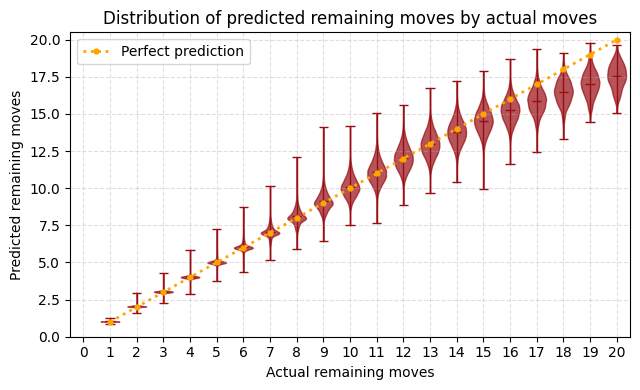

In [10]:
from figure_functions import plot_violin_predicted_moves
plot_violin_predicted_moves(show=True)

## 2) Policy networks

The following policy networks are trained:
- $w=32$, $d=5$, with $\eta = 0.0028$, $n_\mathrm{batch} = 128$, $\lambda = 2.5\cdot 10^{-6}$ (Top-1 from hyperparameter tuning: 0.5206)
- $w=32$, $d=10$, with $\eta = 0.0049$, $n_\mathrm{batch} = 256$, $\lambda = 1.8\cdot 10^{-6}$ (Top-1 from hyperparameter tuning: 0.5822)
- $w=64$, $d=5$, with $\eta = 0.00445$, $n_\mathrm{batch} = 128$, $\lambda = 1.55\cdot 10^{-6}$ (Top-1 from hyperparameter tuning: 0.5547)
- $w=64$, $d=10$, with $\eta = 0.0031$, $n_\mathrm{batch} = 128$, $\lambda = 1.04\cdot 10^{-6}$ (Top-1 from hyperparameter tuning: 0.6209)

est value: -0.620925
Best parameters:
  • lr = 0.003074645505046867
  • bs = 128
  • wd = 1.042467104297568e-06

In [3]:
train_data_pol = NetworkDataset(train_data, "policy")
valid_data_pol = NetworkDataset(validation_data, "policy")

del train_data
del validation_data

In [ ]:
device = torch.device("mps")
policy_net = PolicyNet(5, (9,7), 15, 256)
policy_net.to(device)
train_loss, validation_loss = train_policy_net(policy_net, train_data_pol, valid_data_pol, epochs=15, batch_size=128, learning_rate=0.0003)
torch.save(policy_net.state_dict(), "policy_w256d15_33percentdata.pth")

Epoch 1/15 | Train P: 2.0616 | Val P: 1.4914 (7390.9s)


Epoch 2/15 [Train]:  73%|███████▎  | 15825/21683 [1:44:43<50:42,  1.93it/s]    

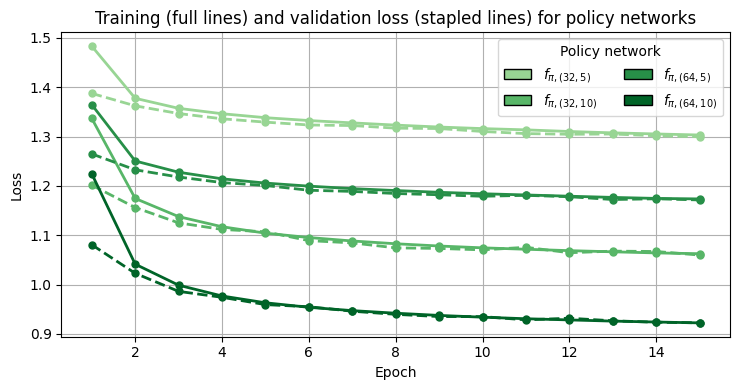

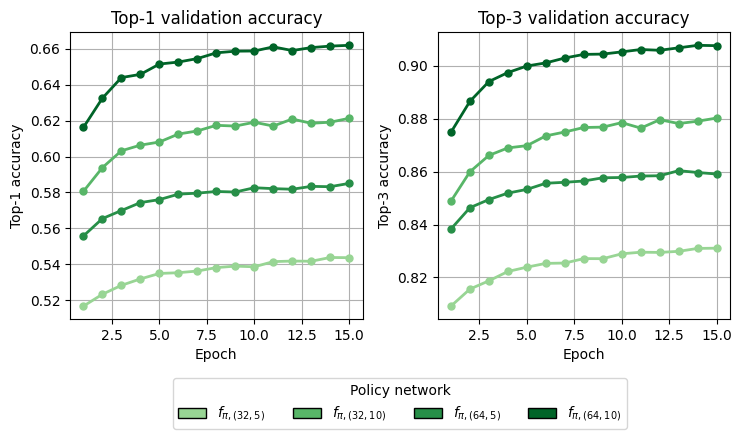

In [6]:
from figure_functions import plot_train_and_validation_for_policy_net
plot_train_and_validation_for_policy_net(show=True)

In [ ]:
# Calibration of policy network
# Load data. Each batch is approximately 100.000 data samples.
loaded_data = []
n_batches = 90  # Max: 90
for i in range(0, n_batches+1):
    batch_num = f"{i:03d}"
    file_path = (f"/Users/espen/Desktop/masteroppgave_uten_chat/beam_search_data/training_data/batches/training_batch_{batch_num}.pkl")
    with open(file_path, "rb") as f:
        batch = pickle.load(f)
    loaded_data.extend(batch)
    del batch
print(f"Loaded {len(loaded_data)} samples from {n_batches} batches")

# Splitting the data into training and testing sets
split_factor = 0.9
train_size = int(split_factor * len(loaded_data))
train_data = loaded_data[:train_size]
validation_data = loaded_data[train_size:]
print(f"Data is split into {round(split_factor*100,0)}% training and {round((1-split_factor)*100,0)}% validation data. Sizes: {len(train_data)} and {len(validation_data)}.")

del loaded_data
del train_data

policy_net_w64d10 = PolicyNet(5, (9,7), 10, 64)
policy_net_w64d10.load_state_dict(torch.load("models/supervised/policy/w64d10/w64d10.pth", torch.device("cpu")))
policy_net_w64d10.eval()

# containers
p_max_list            = []
correct_list          = []
remaining_moves_list  = []
p_true_list           = [] 
embeddings_list       = []      
sampled_full_probs    = []       

for idx, (state, true_action, moves_left) in enumerate(validation_data):
    evaluation = policy_net_w64d10.evaluate_state(state)
    best_action = max(evaluation, key=evaluation.get)
    p_max       = evaluation[best_action]
    p_true      = evaluation[true_action]

    p_max_list.append(p_max)
    correct_list.append(int(best_action == true_action))
    remaining_moves_list.append(moves_left)
    p_true_list.append(p_true)

    
    if (idx+1) % 100000 == 0:
        print(f"Processed {idx+1} states.")

# assume you already have these as lists or arrays
p = np.array(p_max_list)
c = np.array(correct_list, dtype=int)
m = np.array(remaining_moves_list, dtype=int)

# build one “long” DataFrame
df = pd.DataFrame({
    'remaining_moves': m,
    'top1_prob':       p,
    'correct':         c
})

# save to CSV
df.to_csv('/Users/espen/Desktop/masteroppgave_uten_chat/results/6.2_supervised/training_validation/policy_confidence.csv', index=False)


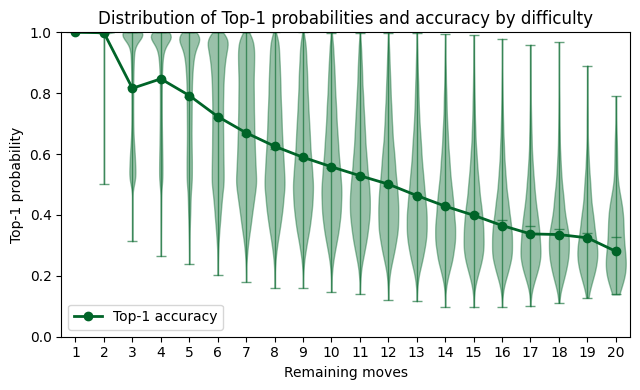

In [9]:
from figure_functions import plot_violin_confidence_accuracy
plot_violin_confidence_accuracy(show=True)

# Evaluation

In [1]:
# Helper functions
def play_greedy_value(board, net):
    """
    Play a greedy game using value network.
    """
    start_time = time.time()
    move_count = 0
    while not FormerGame.is_game_over_static(board):
        valid_turns = FormerGame.get_valid_turns_static(board)
        curr_value = float('inf')
        best_turn = None
        for turn in valid_turns:
            new_board = np.array(FormerGame.apply_turn_static(board, turn))
            value = net.evaluate_state(new_board)
            if value < curr_value:
                curr_value = value
                best_turn = turn
        board = np.array(FormerGame.apply_turn_static(board, best_turn))
        move_count += 1
    end_time = time.time()
    return move_count, end_time - start_time

def play_greedy_policy(board, net):
    start_time = time.time()
    move_count = 0
    while not FormerGame.is_game_over_static(board):
        valid_turns = FormerGame.get_valid_turns_static(board)
        policy = net.evaluate_state(board) # Returns a dictionary: action -> probability
        best_turn = max(valid_turns, key=lambda turn: policy[turn])
        board = np.array(FormerGame.apply_turn_static(board, best_turn))
        move_count += 1
    end_time = time.time()
    return move_count, end_time - start_time

In [4]:
# Initialize arrays and models
n_boards = 1000

# Value
moves_value_w32d5,  times_value_w32d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w32d10, times_value_w32d10 = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w64d5,  times_value_w64d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w64d10, times_value_w64d10 = np.zeros(n_boards), np.zeros(n_boards)

# Policy
moves_policy_w32d5,  times_policy_w32d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w32d10, times_policy_w32d10 = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w64d5,  times_policy_w64d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w64d10, times_policy_w64d10 = np.zeros(n_boards), np.zeros(n_boards)

# LOAD ALL NETS
# Value
value_net_w32d5 = ValueNet(5, (9,7), 5, 32)
value_net_w32d5.load_state_dict(torch.load("models/supervised/value/w32d5/w32d5.pth", torch.device("cpu")))
value_net_w32d5.eval()
value_net_w32d10 = ValueNet(5, (9,7), 10, 32)
value_net_w32d10.load_state_dict(torch.load("models/supervised/value/w32d10/w32d10.pth", torch.device("cpu")))
value_net_w32d10.eval()
value_net_w64d5 = ValueNet(5, (9,7), 5, 64)
value_net_w64d5.load_state_dict(torch.load("models/supervised/value/w64d5/w64d5.pth", torch.device("cpu")))
value_net_w64d5.eval()
value_net_w64d10 = ValueNet(5, (9,7), 10, 64)
value_net_w64d10.load_state_dict(torch.load("models/supervised/value/w64d10/w64d10.pth", torch.device("cpu")))
value_net_w64d10.eval()

# Policy
policy_net_w32d5 = PolicyNet(5, (9,7), 5, 32)
policy_net_w32d5.load_state_dict(torch.load("models/supervised/policy/w32d5/w32d5.pth", torch.device("cpu")))
policy_net_w32d5.eval()
policy_net_w32d10 = PolicyNet(5, (9,7), 10, 32)
policy_net_w32d10.load_state_dict(torch.load("models/supervised/policy/w32d10/w32d10.pth", torch.device("cpu")))
policy_net_w32d10.eval()
policy_net_w64d5 = PolicyNet(5, (9,7), 5, 64)
policy_net_w64d5.load_state_dict(torch.load("models/supervised/policy/w64d5/w64d5.pth", torch.device("cpu")))
policy_net_w64d5.eval()
policy_net_w64d10 = PolicyNet(5, (9,7), 10, 64)
policy_net_w64d10.load_state_dict(torch.load("models/supervised/policy/w64d10/w64d10.pth", torch.device("cpu")))
policy_net_w64d10.eval()

print("Loaded all networks successfully.")

Loaded all networks successfully.


In [ ]:
np.random.seed(22)
boards = np.random.randint(0,4,(1000,9,7))

for i in range(n_boards):
    board = boards[i]
    # Value
    moves_value_w32d5[i], times_value_w32d5[i] = play_greedy_value(boards[i], value_net_w32d5)
    moves_value_w32d10[i], times_value_w32d10[i] = play_greedy_value(boards[i], value_net_w32d10)
    moves_value_w64d5[i], times_value_w64d5[i] = play_greedy_value(boards[i], value_net_w64d5)
    moves_value_w64d10[i], times_value_w64d10[i] = play_greedy_value(boards[i], value_net_w64d10)
    
    # Policy
    moves_policy_w32d5[i], times_policy_w32d5[i] = play_greedy_policy(boards[i], policy_net_w32d5)
    moves_policy_w32d10[i], times_policy_w32d10[i] = play_greedy_policy(boards[i], policy_net_w32d10)
    moves_policy_w64d5[i], times_policy_w64d5[i] = play_greedy_policy(boards[i], policy_net_w64d5)
    moves_policy_w64d10[i], times_policy_w64d10[i] = play_greedy_policy(boards[i], policy_net_w64d10)
    
    if (i+1) % 50 == 0:
        print(f"Played {i+1} / {n_boards} boards")

In [15]:
# After saving to CSVs and loading, it looks like this:
df_val = pd.read_csv('results/6.2_supervised/evaluation/policy_evaluation_old.csv')
df_pol = pd.read_csv('results/6.2_supervised/evaluation/value_evaluation.csv')

summary = df_val.groupby('Method').agg(
    Moves_Mean=('Moves', 'mean'),
    Moves_Std=('Moves', 'std'),
    Time_Mean=('Time', 'mean'),
    Time_Std=('Time', 'std')
).reset_index()
print(summary.to_string(index=False))

summary = df_pol.groupby('Method').agg(
    Moves_Mean=('Moves', 'mean'),
    Moves_Std=('Moves', 'std'),
    Time_Mean=('Time', 'mean'),
    Time_Std=('Time', 'std')
).reset_index()
print(summary.to_string(index=False))

        Method  Moves_Mean  Moves_Std  Time_Mean  Time_Std
$w=32$, $d=10$      15.981   1.738868   0.009122  0.003239
 $w=32$, $d=5$      16.579   1.864735   0.005788  0.001490
$w=64$, $d=10$      15.821   1.729726   0.012356  0.002938
 $w=64$, $d=5$      16.201   1.784316   0.007234  0.002215
        Method  Moves_Mean  Moves_Std  Time_Mean  Time_Std
$w=32$, $d=10$      15.559   1.956105   0.178516  0.051896
 $w=32$, $d=5$      15.574   1.875111   0.101164  0.027292
$w=64$, $d=10$      15.345   1.924494   0.285004  0.069544
 $w=64$, $d=5$      15.349   1.847326   0.149341  0.038897


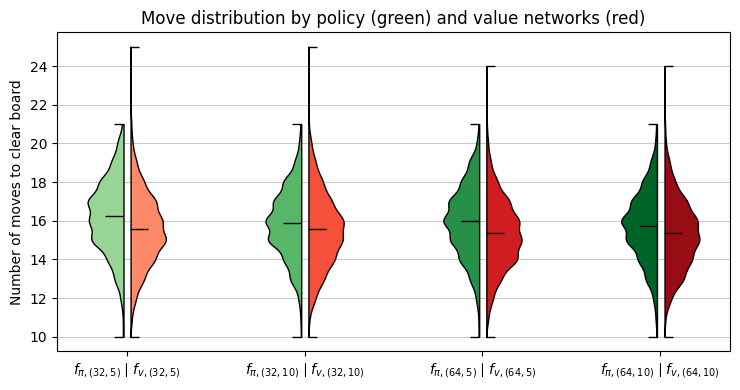

In [16]:
from figure_functions import plot_value_vs_policy_distributions
plot_value_vs_policy_distributions(show=True)

In [8]:
np.random.seed(22)
import daily_board as db
board_tuples = db.get_daily_board()
best_actual_sols = [bt[1] for _, bt in board_tuples.items()]

# Initialize arrays and models
n_boards = 100

# Value
moves_value_w32d5,  times_value_w32d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w32d10, times_value_w32d10 = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w64d5,  times_value_w64d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_value_w64d10, times_value_w64d10 = np.zeros(n_boards), np.zeros(n_boards)

# Policy
moves_policy_w32d5,  times_policy_w32d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w32d10, times_policy_w32d10 = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w64d5,  times_policy_w64d5  = np.zeros(n_boards), np.zeros(n_boards)
moves_policy_w64d10, times_policy_w64d10 = np.zeros(n_boards), np.zeros(n_boards)

i = 0
for key, tup in board_tuples.items():
    # Value
    moves_value_w32d5[i], times_value_w32d5[i] = play_greedy_value(tup[0], value_net_w32d5)
    moves_value_w32d10[i], times_value_w32d10[i] = play_greedy_value(tup[0], value_net_w32d10)
    moves_value_w64d5[i], times_value_w64d5[i] = play_greedy_value(tup[0], value_net_w64d5)
    moves_value_w64d10[i], times_value_w64d10[i] = play_greedy_value(tup[0], value_net_w64d10)
    
    # Policy
    moves_policy_w32d5[i], times_policy_w32d5[i] = play_greedy_policy(tup[0], policy_net_w32d5)
    moves_policy_w32d10[i], times_policy_w32d10[i] = play_greedy_policy(tup[0], policy_net_w32d10)
    moves_policy_w64d5[i], times_policy_w64d5[i] = play_greedy_policy(tup[0], policy_net_w64d5)
    moves_policy_w64d10[i], times_policy_w64d10[i] = play_greedy_policy(tup[0], policy_net_w64d10)
    
    if (i+1) % 10 == 0:
        print(f"Played {i+1} / {n_boards} boards")
    i += 1

Played 10 / 100 boards
Played 20 / 100 boards
Played 30 / 100 boards
Played 40 / 100 boards
Played 50 / 100 boards
Played 60 / 100 boards
Played 70 / 100 boards
Played 80 / 100 boards
Played 90 / 100 boards
Played 100 / 100 boards


In [9]:
best = np.array(best_actual_sols)
models = {
    "Value w32 d5":   moves_value_w32d5,
    "Value w32 d10":  moves_value_w32d10,
    "Value w64 d5":   moves_value_w64d5,
    "Value w64 d10":  moves_value_w64d10,
    "Policy w32 d5":  moves_policy_w32d5,
    "Policy w32 d10": moves_policy_w32d10,
    "Policy w64 d5":  moves_policy_w64d5,
    "Policy w64 d10": moves_policy_w64d10,
}

deviation_range = range(0, 11)
table_data = {}
for name, moves in models.items():
    diffs = np.abs(moves - best).astype(int)
    counts = [np.sum(diffs == d) for d in deviation_range]
    table_data[name] = counts

# 5) Turn it into a DataFrame, transpose so rows=Model and columns=Deviation:
df = pd.DataFrame(table_data, index=deviation_range).T
df.index.name = "Model"
df.columns.name = "Deviation"

print(df)


Deviation       0   1   2   3   4   5   6   7   8   9   10
Model                                                     
Value w32 d5    14  34  27  13   8   2   2   0   0   0   0
Value w32 d10   12  32  28  16   5   4   1   0   1   1   0
Value w64 d5    20  44  17  12   7   0   0   0   0   0   0
Value w64 d10   20  42  20  15   1   1   0   1   0   0   0
Policy w32 d5    5  16  31  27  14   4   2   1   0   0   0
Policy w32 d10   6  24  36  23   8   2   0   1   0   0   0
Policy w64 d5    5  21  32  25  12   4   1   0   0   0   0
Policy w64 d10   8  30  34  20   6   2   0   0   0   0   0


In [13]:
# Initial move analysis
i = 0
actions = []
for i in range(100000):
    board = np.random.randint(0,4,(9,7))
    pol = policy_net_w64d10.evaluate_state(board)
    actions.append(max(pol, key=pol.get))

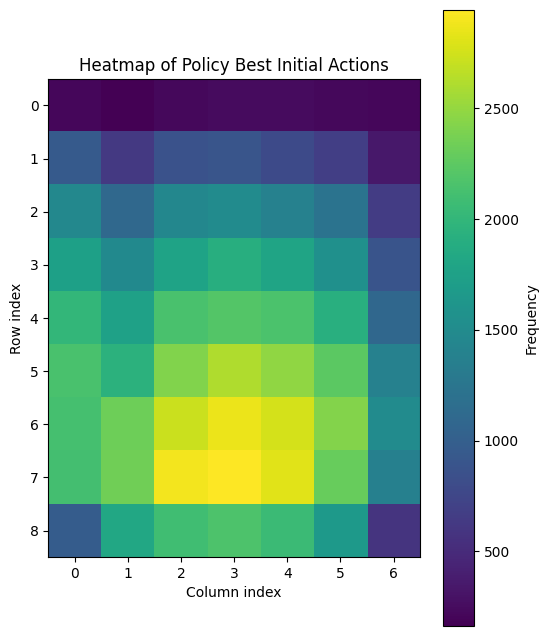

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose `actions` is your precomputed list of best (row, col) actions over 10,000 boards.
# For example:
# actions = [(r0, c0), (r1, c1), ..., (r9999, c9999)]

# 1) Build frequency heatmap
heatmap = np.zeros((9, 7), dtype=int)
for (row, col) in actions:
    heatmap[row, col] += 1

# 2) Plot heatmap
plt.figure(figsize=(6, 8))
plt.imshow(heatmap, origin='upper')
plt.colorbar(label='Frequency')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.title('Heatmap of Policy Best Initial Actions')
plt.xticks(range(7))
plt.yticks(range(9))
plt.show()
